In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import time
from math import pi
from scipy import signal
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import numpy as np
from scipy import stats
from tensorflow import keras

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
path = "/content/drive/My Drive/masters/TDE/Paper/"
model_name = "cnn_3conv_1flt_1dense"

thetav = np.loadtxt(path + 'thetav-1000.csv',delimiter=',')
Vec = np.loadtxt(path + 'Vecv-1000.csv',delimiter = ',')

In [5]:
sc = MinMaxScaler()
X_n = sc.fit_transform(Vec)
sc2 = MinMaxScaler()
y_n = sc2.fit_transform(thetav)

In [6]:
X_n = X_n.reshape(-1,8000,1)
select=[1]

In [7]:
train_size = 0.7
lng = len(X_n)
X_treinamento = X_n[:round(lng*0.6)]
y_treinamento = y_n[:round(lng*0.6)]
X_valid = X_n[round(lng*0.6):round(lng*0.85)]
y_valid = y_n[round(lng*0.6):round(lng*0.85)]
X_test = X_n[round(lng*0.85):]
y_test = y_n[round(lng*0.85):]
X_treinamento, X_valid, X_test = X_treinamento.reshape(-1,X_treinamento.shape[1],1), X_valid.reshape(-1,X_treinamento.shape[1],1),  X_test.reshape(-1,X_treinamento.shape[1],1)

In [8]:
X_treinamento.shape,y_treinamento.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((600, 8000, 1),
 (600, 10),
 (250, 8000, 1),
 (250, 10),
 (150, 8000, 1),
 (150, 10))

In [9]:
def get_model():
    input_layer1 = keras.layers.Input(X_treinamento.shape[1:])

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=8,strides=400)(input_layer1)
    conv1 = keras.layers.MaxPooling1D()(conv1)
    conv1 = keras.layers.Activation(activation='relu')(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3)(conv1)
    conv2 = keras.layers.MaxPooling1D()(conv2)
    conv2 = keras.layers.Activation(activation='relu')(conv2)

    conv3 = keras.layers.Conv1D(filters=96, kernel_size=3)(conv2)
    conv3 = keras.layers.MaxPooling1D()(conv3)
    conv3 = keras.layers.Activation(activation='relu')(conv3)

    flt = keras.layers.Flatten()(conv3)
    dropout = keras.layers.Dropout(0.4)(flt)

    dense2 = keras.layers.Dense(50,activation='relu')(dropout)

    out = keras.layers.Dense(10, activation='linear')(dense2)

    model = keras.models.Model(inputs=input_layer1, outputs=out)


    model.compile(optimizer=tf.keras.optimizers.Adam(),  # Optimizer
                loss='mse')

    return model

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=20,
                                                      min_lr=0.0001)
file_path = model_name + '.hdf5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss', save_best_only=True)
callbacks = [reduce_lr, model_checkpoint]

model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 20, 32)            288       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 32)            0         
_________________________________________________________________
activation (Activation)      (None, 10, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
activation_1 (Activation)    (None, 4, 64)             0     

# Fit model on training data
Epoch 1/300
60/60 [==============================] - 0s 6ms/step - loss: 0.1645 - val_loss: 0.0920 - lr: 0.0010
Epoch 2/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 0.0872 - lr: 0.0010
Epoch 3/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.0847 - lr: 0.0010
Epoch 4/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0861 - val_loss: 0.0828 - lr: 0.0010
Epoch 5/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0853 - val_loss: 0.0808 - lr: 0.0010
Epoch 6/300
60/60 [==============================] - 0s 3ms/step - loss: 0.0825 - val_loss: 0.0780 - lr: 0.0010
Epoch 7/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0798 - val_loss: 0.0762 - lr: 0.0010
Epoch 8/300
60/60 [==============================] - 0s 4ms/step - loss: 0.0781 - val_loss: 0.0758 - lr: 0.0010
Epoch 9/300
60/60 [==============================] - 0s 4ms/step - loss: 0.

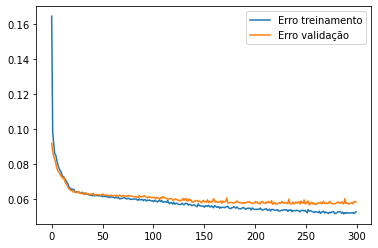

In [10]:
print('# Fit model on training data')
history = model.fit(X_treinamento, (y_treinamento),
                    batch_size=10,
                    epochs=300,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(X_valid, (y_valid)),
                    callbacks=callbacks)
                    

plt.figure()
plt.plot(history.history['loss'], label='Erro treinamento')
plt.plot(history.history['val_loss'], label='Erro validação')
plt.legend()
plt.show()

In [11]:
CONV1D_MODEL = keras.models.load_model(model_name + '.hdf5')
y_pred_CONV1D = CONV1D_MODEL.predict(X_test)

In [12]:
MSE = ((y_test - y_pred_CONV1D)**2).mean(axis=0)
print(MSE)

[0.01214058 0.07319781 0.07875137 0.0584628  0.06229366 0.01749875
 0.08485549 0.0819583  0.01214063 0.08119159]


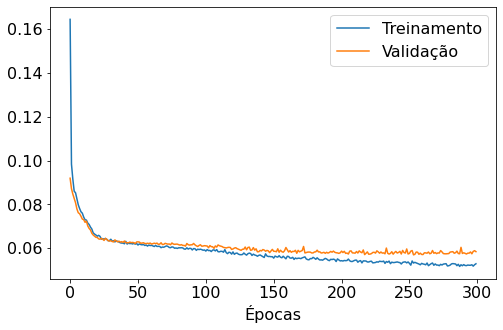

In [13]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize = (8,5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.legend()
plt.savefig('Loss.pdf',bbox_inches = 'tight', dpi=300)
plt.savefig('loss.png',bbox_inches = 'tight', dpi=300)